In [1]:
#Downloads test image
import requests # request img from web
import shutil # save img locally

url = 'https://i.pinimg.com/originals/3f/eb/e1/3febe1d03d1f609ea47404690cc0865a.jpg'
file_name = 'cat.jpg'

res = requests.get(url, stream = True)

if res.status_code == 200:
    with open(file_name,'wb') as f:
        shutil.copyfileobj(res.raw, f)
    print('Image sucessfully Downloaded: ',file_name)
else:
    print('Image Couldn\'t be retrieved')

Image sucessfully Downloaded:  cat.jpg


In [16]:
#highpass filter for each color channel
from PIL import Image as im_lib
from PIL import ImageFilter

#combines the filters for each color channel as one image
def highpassrgb(image):
    red, green, blue = image.split()
    return im_lib.merge(mode='RGB',bands=(red.filter(ImageFilter.Kernel((3,3),(0,-1,0,-1,4,-1,0,-1,0),1,0)), green.filter(ImageFilter.Kernel((3,3),(0,-1,0,-1,4,-1,0,-1,0),1,0)), blue.filter(ImageFilter.Kernel((3,3),(0,-1,0,-1,4,-1,0,-1,0),1,0))))

#each as a separate image
def highpassrgb2(image):
    red, green, blue = image.split()
    return red.filter(ImageFilter.Kernel((3,3),(0,-1,0,-1,4,-1,0,-1,0),1,0)), green.filter(ImageFilter.Kernel((3,3),(0,-1,0,-1,4,-1,0,-1,0),1,0)), blue.filter(ImageFilter.Kernel((3,3),(0,-1,0,-1,4,-1,0,-1,0),1,0))


In [66]:
#tests highpassrgb and highpassrgb2
import os
from PIL import Image as im_lib
from PIL import ImageFilter


image = im_lib.open('cat.png')
#red, green, blue = image.split()
#red.show()
#green.show()
#blue.show()
#check = im_lib.merge(mode='RGB',bands=(red,green,blue))
#check.show()

highpassrgb(image).save('highpasscombined.png')

testred, testblue, testgreen = highpassrgb2(image)
testred.save('highpassred.png')
testblue.save('highpassblue.png')
testgreen.save('highpassgreen.png')

image2 = im_lib.open('dog.png') #ai dog from biggan
#red, green, blue = image.split()
#red.show()
#green.show()
#blue.show()
#check = im_lib.merge(mode='RGB',bands=(red,green,blue))
#check.show()

highpassrgb(image2).save('highpasscombinedai.png')

testred, testblue, testgreen = highpassrgb2(image2)
testred.save('highpassredai.png')
testblue.save('highpassblueai.png')
testgreen.save('highpassgreenai.png')

In [44]:
#discrete cosine transform
#https://arxiv.org/pdf/2003.08685.pdf
#https://stackoverflow.com/questions/7110899/how-do-i-apply-a-dct-to-an-image-in-python

import numpy as np
from scipy.fftpack import dct, idct
from PIL import Image as im_lib

#grayscale
def gdct(image):
    a = np.array(image.convert('L'))
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

#each channel separately
def rgbdct(image):
    R,G,B = image.split()
    r=np.array(R)
    g=np.array(G)
    b=np.array(B)
    return dct(dct(r.T, norm='ortho').T, norm='ortho'), dct(dct(g.T, norm='ortho').T, norm='ortho'), dct(dct(b.T, norm='ortho').T, norm='ortho')


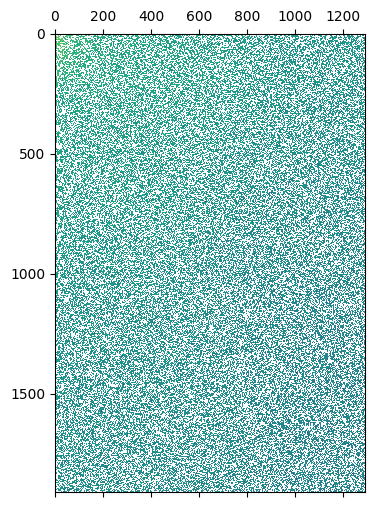

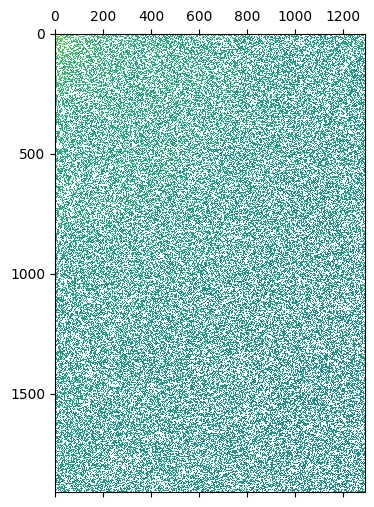

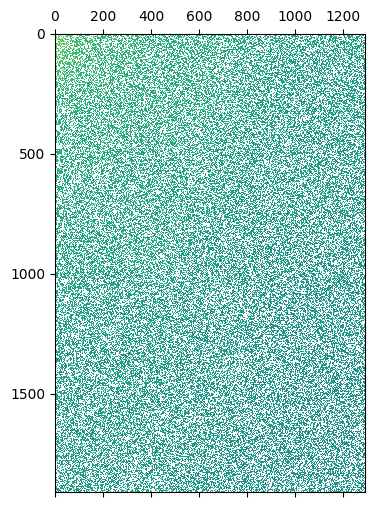

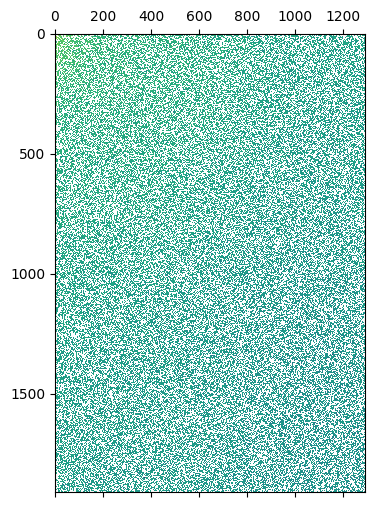

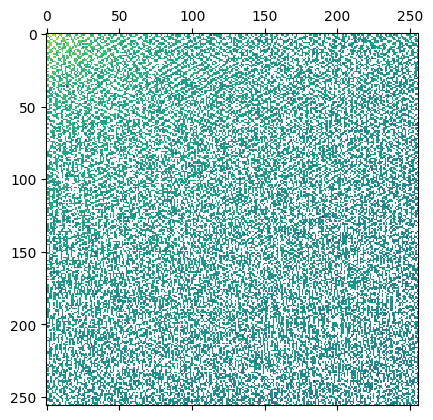

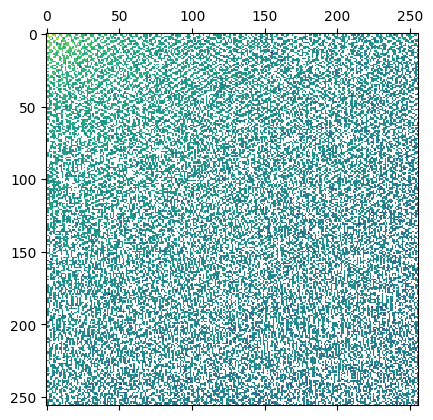

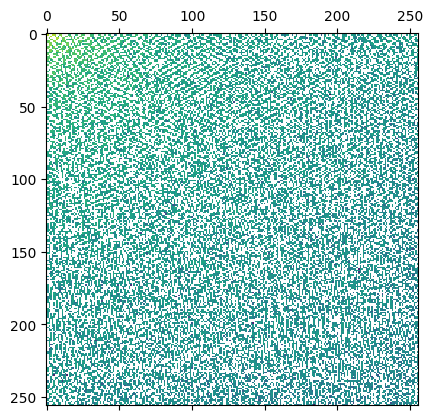

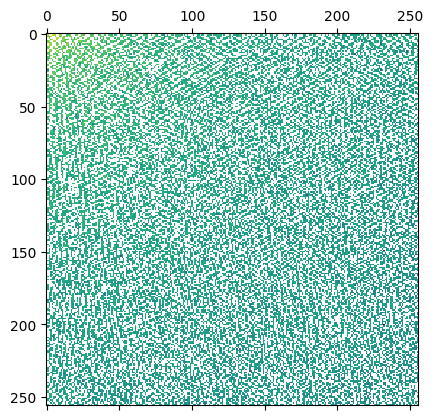

In [53]:
#tests gdft with log scale visualization
#could be displayed better
import os
from PIL import Image as im_lib
from PIL import ImageFilter
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


image = im_lib.open('cat.jpg')
matrixgray1 = gdct(image)
matrixr1, matrixg1, matrixb1 = rgbdct(image)
gray1=plt.matshow(matrixgray1,norm=matplotlib.colors.LogNorm())
r1=plt.matshow(matrixr1,norm=matplotlib.colors.LogNorm())
g1=plt.matshow(matrixg1,norm=matplotlib.colors.LogNorm())
b1=plt.matshow(matrixb1,norm=matplotlib.colors.LogNorm())


image2 = im_lib.open('dog.png')
matrixgray2 = gdct(image2)
matrixr2, matrixg2, matrixb2 = rgbdct(image2)
gray2=plt.matshow(matrixgray2,norm=matplotlib.colors.LogNorm())
r2=plt.matshow(matrixr2,norm=matplotlib.colors.LogNorm())
g2=plt.matshow(matrixg2,norm=matplotlib.colors.LogNorm())
b2=plt.matshow(matrixb2,norm=matplotlib.colors.LogNorm())



In [ ]:
#co-occurence matrix
#https://arxiv.org/pdf/2203.01716.pdf
#ideas: https://ietresearch.onlinelibrary.wiley.com/doi/10.1049/iet-ipr.2018.6440

In [33]:

# Applies a high-pass filter to processed images and saves them to a new directory
PROCESSED_DIRECTORY = "Test1_modular"
HIGHPASS_DIRECTORY = "Highpass"

import os
from PIL import Image as im_lib
from PIL import ImageFilter

def obtain_processed_image_paths(processed_directory = PROCESSED_DIRECTORY):
    data_directory = os.listdir("./"+processed_directory)
    list_of_processed_image_paths = []
    for dirpath, dirname, filename in os.walk("./"+processed_directory):
        if not dirname:
            for dirpath2, dirname2, filename2 in os.walk(dirpath):
                for filedir in filename2:
                    list_of_processed_image_paths.append(dirpath+"./"+filedir)
    return list_of_processed_image_paths


def filter_images(list_of_processed_image_paths,highpass_directory=HIGHPASS_DIRECTORY):
    if not os.path.exists("./"+highpass_directory):
        os.mkdir(highpass_directory)
    m = 0
    N = len(list_of_processed_image_paths)
    for image_path in list_of_processed_image_paths:
        m += 1
        image = im_lib.open(image_path).convert('L')
        highpass = image.filter(ImageFilter.Kernel((3,3),(0,-1,0,-1,4,-1,0,-1,0),1,0))
        highpass.save("./"+highpass_directory+"./"+os.path.basename(image_path),quality= 100)
        print(str(m)+"/"+str(N), end="\r")

In [34]:
processed_image_paths=obtain_processed_image_paths()
filter_images(processed_image_paths)

In [ ]:
#highpass filter in scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from skimage.io import imread


def highpass(image):
    data = np.array(im, dtype=float)
    kernel = np.array([[0, -1, 0],
                   [-1,  4, -1],
                   [0, -1, 0]])
    return(ndimage.convolve(data,kernel))
